# Solving PDE's (heat equation) using FTCS, BTCS and Crank-Nicolson methods

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

In [11]:
import scipy.linalg as la

In [94]:
def ftcs(a,b,h, delta_t, t0,tf,u0,ua,ub):
    n = int((b-a)/h)
    m = int((tf-t0)/delta_t)
    u = np.zeros((n,m))
    t = np.linspace(t0,tf,m)
    x = np.linspace(a,b,n)
    l = m/n**2
    u[:,0] = u0(x)
    u[0,:] = ua(t)
    u[m-1,:] = ub(t)
    #print(u)
    for j in range(m-2):
        for i in range(1,n-1):
            #print(u.shape)
            u[i,j+1] = (1-2*l)*u[i,j] + l*(u[i+1,j]+u[i-1,j])
            #print(u[i,j+1])
    return(u)

In [61]:
def btcs(a,b,h, delta_t, t0,tf,u0,ua,ub):
    n = int((b-a)/h)
    m = int((tf-t0)/delta_t)
    u = np.zeros((n,m))
    t = np.linspace(t0,tf,m)
    x = np.linspace(a,b,n)
    l = m/n**2

    u[:,0] = u0(x)
    u[0,:] = ua(t)
    u[m-1,:] = ub(t)
    #print(u)
    A = np.zeros((n-2,n-2))
    for i in range(n-2):
        if i==0:
            A[i,i] = 1+2*l
            A[i,i+1] = -l
        elif i==n-3:
                A[i,i-1] = -l
                A[i,i] = 1+2*l
        else:
            A[i,i-1] = -l
            A[i,i] = 1+2*l
            A[i,i+1] = -l
    #print(A)
    b = np.zeros(n-2)
    A_inv = (la.pinv(A)).T       
    for j in range(1,m):
        b[0] = l*u[0,j]
        b[n-3] = l*u[n-1,j]
        u[1:n-1,j] = (u[1:n-1,j-1]+b)@A_inv
    return(u)

In [59]:
def crank_nicolson(a,b,h, delta_t, t0,tf,u0,ua,ub):
    n = int((b-a)/h)
    m = int((tf-t0)/delta_t)
    u = np.zeros((n,m))
    t = np.linspace(t0,tf,m)
    x = np.linspace(a,b,n)
    l = m/n**2

    u[:,0] = u0(x)
    u[0,:] = ua(t)
    u[m-1,:] = ub(t)
    
    A = np.zeros((n-2,n-2))
    B = np.zeros((n-2,n-2))

    for i in range(n-2):
        if i==0:
            A[i,i] = 2*(1-l)
            A[i,i+1] = l
            B[i,i] = 2*(1+l)
            B[i,i+1] = -l
        elif i==n-3:
                A[i,i-1] = l
                A[i,i] = 2*(1-l)
                B[i,i-1] = -l
                B[i,i] = 2*(1+l)
        else:
            A[i,i-1] = l
            A[i,i] = 2*(1-l)
            A[i,i+1] = l
            B[i,i-1] = -l
            B[i,i] = 2*(1+l)
            A[i,i+1] = -l
            
    b = np.zeros(n-2)
    B_inv = (la.pinv(B)).T    
    for j in range(1,m):
        b[0] = l*u[0,j-1]
        b[n-3] = l*u[n-1,j-1]
        u[1:n-1,j] = (u[1:n-1,j-1]@A.T+b)@B_inv
    return(u)

In [85]:
def ivp(x):
    return(4*x*(1-x))

In [66]:
def bvp(t):
    return(0)

In [71]:
U_cs = crank_nicolson(0,1,0.01,0.01 ,0,1,ivp,bvp,bvp)

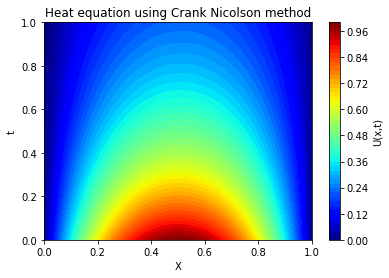

In [97]:
plt.contourf(np.linspace(0,1,100),np.linspace(0,1,100),U_cs.T, 50, cmap='jet')
cbar = plt.colorbar()
plt.xlabel("X")
plt.ylabel("t")
cbar.ax.set_ylabel("U(x,t)")
plt.title('Heat equation using Crank Nicolson method')
plt.show()